<a href="https://colab.research.google.com/github/raj-vijay/ml/blob/master/05.Cluster%20Analysis%20in%20Python/09_FIFA_18_exploring_defenders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

- sliding tackle: a number between 0-99 which signifies how accurate a player is able to perform sliding tackles
- aggression: a number between 0-99 which signifies the commitment and will of a player

These are typically high in defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

In [ ]:
from scipy.cluster.vq import kmeans, vq
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd
import random
random.seed((1000,2000))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!wget https://assets.datacamp.com/production/repositories/3842/datasets/2f0473692782600a2b7c0f7d4a0dc38295c87015/fifa_18_dataset.csv

--2020-05-25 01:27:46--  https://assets.datacamp.com/production/repositories/3842/datasets/2f0473692782600a2b7c0f7d4a0dc38295c87015/fifa_18_dataset.csv
Resolving assets.datacamp.com (assets.datacamp.com)... 13.224.166.4, 13.224.166.92, 13.224.166.96, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|13.224.166.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107925 (105K) [text/csv]
Saving to: ‘fifa_18_dataset.csv’

fifa_18_dataset.csv 100%[===================>] 105.40K   229KB/s    in 0.5s    

2020-05-25 01:27:48 (229 KB/s) - ‘fifa_18_dataset.csv’ saved [107925/107925]



In [ ]:
import pandas as pd

In [ ]:
fifa = pd.read_csv('fifa_18_dataset.csv')

In [ ]:
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [ ]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

In [ ]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['sliding_tackle', 'aggression']], 'ward')

In [ ]:
# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

In [ ]:
# Display cluster centers of each cluster
print(fifa[['sliding_tackle', 'aggression', 'cluster_labels']].groupby('cluster_labels').mean())

                sliding_tackle  aggression
cluster_labels                            
1                    62.336711   64.896142
2                    15.289588   28.012052
3                    28.439806   53.722328


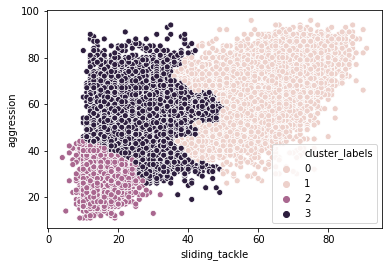

In [ ]:
# Create a scatter plot through seaborn
sns.scatterplot(x='sliding_tackle', y='aggression', hue='cluster_labels', data=fifa)
plt.show()